In [1]:
import pandas as pd
import json

In [2]:
#pd.set_option('display.min_rows', None)
#pd.set_option('display.max_rows', None)

In [3]:
RESULT_PATH = '../logs/l1_surplus_fast.txt'

In [4]:
results = []
with open(RESULT_PATH, 'r') as file:
    for line in file.readlines():
        try:
            results.append(json.loads(line))
        except json.JSONDecodeError:
                pass
    
results = [result | {'attack_no': i} for i, result in enumerate(results)]
results

[{'entry_results': [{'faulted_coeffs': 1024,
    'total_equations': 1024,
    'filtered_equations': 1024,
    'duration': 20.98004698753357,
    'failure': False,
    'equations_used': 1024.0}],
  'm': 0,
  'num_signatures': 1,
  'nist_param_level': 1,
  'threshold': 1275.0,
  'notion_of_success': 1024,
  'timeout_limit': 300,
  'attack_no': 0},
 {'entry_results': [{'faulted_coeffs': 1024,
    'total_equations': 1024,
    'filtered_equations': 1024,
    'duration': 19.811275005340576,
    'failure': False,
    'equations_used': 1024.0}],
  'm': 0,
  'num_signatures': 1,
  'nist_param_level': 1,
  'threshold': 1275.0,
  'notion_of_success': 1024,
  'timeout_limit': 300,
  'attack_no': 1},
 {'entry_results': [{'faulted_coeffs': 2046,
    'total_equations': 2048,
    'filtered_equations': 2046,
    'duration': 19.50904417037964,
    'failure': False,
    'equations_used': 2046.0}],
  'm': 1,
  'num_signatures': 2,
  'nist_param_level': 1,
  'threshold': 1275.0,
  'notion_of_success': 1024

In [5]:
meta = [key for key in results[0].keys() if key != 'entry_results']
meta

['m',
 'num_signatures',
 'nist_param_level',
 'threshold',
 'notion_of_success',
 'timeout_limit',
 'attack_no']

In [6]:
df = pd.json_normalize(data=results, record_path='entry_results', meta=meta)
df = df.assign(false_positive_rate=lambda x: (x.filtered_equations - x.faulted_coeffs) / x.filtered_equations)
df

,faulted_coeffs,total_equations,filtered_equations,duration,failure,equations_used,failure_reason,m,num_signatures,nist_param_level,threshold,notion_of_success,timeout_limit,attack_no,false_positive_rate
0,1024,1024,1024,20.980047,False,1024.0,NaN,0,1,1,1275.0,1024,300,0,0.000000
1,1024,1024,1024,19.811275,False,1024.0,NaN,0,1,1,1275.0,1024,300,1,0.000000
2,2046,2048,2046,19.509044,False,2046.0,NaN,1,2,1,1275.0,1024,300,2,0.000000
3,2046,2048,2047,30.729814,False,2046.0,NaN,1,2,1,1275.0,1024,300,3,0.000489
4,2044,2048,2044,18.042357,False,2044.0,NaN,2,2,1,1275.0,1024,300,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,1690,576512,3101,NaN,True,NaN,TIME_LIMIT,1021,563,1,1275.0,1690,300,2398,0.455015
2399,1693,577536,3082,NaN,True,NaN,TIME_LIMIT,1021,564,1,1275.0,1691,300,2399,0.450681
2400,1692,577536,3159,NaN,True,NaN,TIME_LIMIT,1021,564,1,1275.0,1691,300,2400,0.464387
2401,1695,578560,3125,NaN,True,NaN,TIME_LIMIT,1021,565,1,1275.0,1693,300,2401,0.457600


In [7]:
df_by_attack = df
df_by_attack

,faulted_coeffs,total_equations,filtered_equations,duration,failure,equations_used,failure_reason,m,num_signatures,nist_param_level,threshold,notion_of_success,timeout_limit,attack_no,false_positive_rate
0,1024,1024,1024,20.980047,False,1024.0,NaN,0,1,1,1275.0,1024,300,0,0.000000
1,1024,1024,1024,19.811275,False,1024.0,NaN,0,1,1,1275.0,1024,300,1,0.000000
2,2046,2048,2046,19.509044,False,2046.0,NaN,1,2,1,1275.0,1024,300,2,0.000000
3,2046,2048,2047,30.729814,False,2046.0,NaN,1,2,1,1275.0,1024,300,3,0.000489
4,2044,2048,2044,18.042357,False,2044.0,NaN,2,2,1,1275.0,1024,300,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,1690,576512,3101,NaN,True,NaN,TIME_LIMIT,1021,563,1,1275.0,1690,300,2398,0.455015
2399,1693,577536,3082,NaN,True,NaN,TIME_LIMIT,1021,564,1,1275.0,1691,300,2399,0.450681
2400,1692,577536,3159,NaN,True,NaN,TIME_LIMIT,1021,564,1,1275.0,1691,300,2400,0.464387
2401,1695,578560,3125,NaN,True,NaN,TIME_LIMIT,1021,565,1,1275.0,1693,300,2401,0.457600


In [8]:
df_num_failures = df_by_attack.groupby(['m', 'notion_of_success']).aggregate({'failure': 'sum'})
df_num_failures['good_success_rate'] = df_num_failures['failure'].apply(lambda x: x < 2)
df_num_failures

failure  good_success_rate
m    notion_of_success                            
0    1024                     0               True
1    1024                     0               True
2    1024                     0               True
3    1024                     0               True
4    1024                     0               True
...                         ...                ...
1021 1687                     2              False
     1688                     2              False
     1690                     2              False
     1691                     2              False
     1693                     2              False

[1171 rows x 2 columns]

In [9]:
df_m_max_threshold = df_num_failures[df_num_failures['good_success_rate']].reset_index()[['m', 'notion_of_success']]
df_m_max_threshold

,m,notion_of_success
0,0,1024
1,1,1024
2,2,1024
3,3,1024
4,4,1024
...,...,...
1016,1016,1425
1017,1017,1425
1018,1018,1448
1019,1019,1547


In [10]:
df_m_max_threshold

,m,notion_of_success
0,0,1024
1,1,1024
2,2,1024
3,3,1024
4,4,1024
...,...,...
1016,1016,1425
1017,1017,1425
1018,1018,1448
1019,1019,1547


In [11]:
df_m_minsurplusneeded = df_m_max_threshold.copy()
df_m_minsurplusneeded['notion_of_success'] = df_m_minsurplusneeded['notion_of_success'] - 1024
df_m_minsurplusneeded = df_m_minsurplusneeded.rename(columns={'notion_of_success': 'surplus'})
df_m_minsurplusneeded

,m,surplus
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1016,1016,401
1017,1017,401
1018,1018,424
1019,1019,523


<AxesSubplot:xlabel='no. of iterations before fault occurs (m)', ylabel='surplus of equations'>

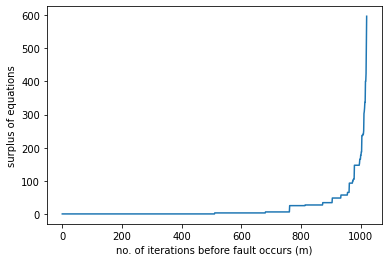

In [12]:
ax = df_m_minsurplusneeded.set_index('m')['surplus'].plot()
ax.set_xlabel('no. of iterations before fault occurs (m)')
ax.set_ylabel("surplus of equations")
fig = ax.get_figure()
fig.savefig("../../cleanthesis/plots/server_qtesla_i_surplus.pdf", format="pdf", bbox_inches='tight', transparent=True)
ax

In [13]:
df_by_attack_good_sr = df_by_attack.merge(df_m_max_threshold, on=['m', 'notion_of_success'])
df_by_attack_good_sr

,faulted_coeffs,total_equations,filtered_equations,duration,failure,equations_used,failure_reason,m,num_signatures,nist_param_level,threshold,notion_of_success,timeout_limit,attack_no,false_positive_rate
0,1024,1024,1024,20.980047,False,1024.0,NaN,0,1,1,1275.0,1024,300,0,0.000000
1,1024,1024,1024,19.811275,False,1024.0,NaN,0,1,1,1275.0,1024,300,1,0.000000
2,2046,2048,2046,19.509044,False,2046.0,NaN,1,2,1,1275.0,1024,300,2,0.000000
3,2046,2048,2047,30.729814,False,2046.0,NaN,1,2,1,1275.0,1024,300,3,0.000489
4,2044,2048,2044,18.042357,False,2044.0,NaN,2,2,1,1275.0,1024,300,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,1452,247808,2043,194.673651,False,1452.0,NaN,1018,242,1,1275.0,1448,300,2181,0.289280
2069,1550,317440,2341,198.363289,False,1550.0,NaN,1019,310,1,1275.0,1547,300,2255,0.337890
2070,1550,317440,2294,205.985191,False,1550.0,NaN,1019,310,1,1275.0,1547,300,2256,0.324324
2071,1624,415744,2636,289.824187,False,1624.0,NaN,1020,406,1,1275.0,1621,300,2315,0.383915


In [14]:
df_by_attack_good_sr_successful = df_by_attack_good_sr[df_by_attack_good_sr['failure'] == False]
df_by_attack_good_sr_successful

,faulted_coeffs,total_equations,filtered_equations,duration,failure,equations_used,failure_reason,m,num_signatures,nist_param_level,threshold,notion_of_success,timeout_limit,attack_no,false_positive_rate
0,1024,1024,1024,20.980047,False,1024.0,NaN,0,1,1,1275.0,1024,300,0,0.000000
1,1024,1024,1024,19.811275,False,1024.0,NaN,0,1,1,1275.0,1024,300,1,0.000000
2,2046,2048,2046,19.509044,False,2046.0,NaN,1,2,1,1275.0,1024,300,2,0.000000
3,2046,2048,2047,30.729814,False,2046.0,NaN,1,2,1,1275.0,1024,300,3,0.000489
4,2044,2048,2044,18.042357,False,2044.0,NaN,2,2,1,1275.0,1024,300,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,1452,247808,2043,194.673651,False,1452.0,NaN,1018,242,1,1275.0,1448,300,2181,0.289280
2069,1550,317440,2341,198.363289,False,1550.0,NaN,1019,310,1,1275.0,1547,300,2255,0.337890
2070,1550,317440,2294,205.985191,False,1550.0,NaN,1019,310,1,1275.0,1547,300,2256,0.324324
2071,1624,415744,2636,289.824187,False,1624.0,NaN,1020,406,1,1275.0,1621,300,2315,0.383915


In [15]:
df_by_attack_good_sr_successful_mean = df_by_attack_good_sr_successful.groupby(['m', 'notion_of_success']).aggregate({
    'num_signatures': 'mean',
    'false_positive_rate': 'mean',
    'duration': 'mean'
    
})
df_by_attack_good_sr_successful_mean

,,num_signatures,false_positive_rate,duration
m,notion_of_success,,,
0,1024,1.0,0.000000,20.395661
1,1024,2.0,0.000244,25.119429
2,1024,2.0,0.000000,16.272534
3,1024,2.0,0.000000,17.889716
4,1024,2.0,0.000000,18.537773
...,...,...,...,...
1016,1425,179.0,0.242644,113.869545
1017,1425,204.0,0.254058,148.715397
1018,1448,242.0,0.287357,192.322244


<AxesSubplot:xlabel='no. of iterations before fault occurs (m)', ylabel='avgerage signature count'>

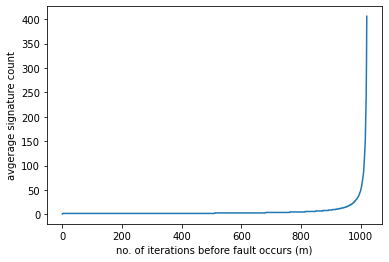

In [16]:
ax = df_by_attack_good_sr_successful_mean.reset_index()[['m', 'num_signatures']].rename(columns={'num_signatures': 'NIST Security Level I'})['NIST Security Level I'].plot()
ax.set_xlabel('no. of iterations before fault occurs (m)')
ax.set_ylabel("avgerage signature count")
fig = ax.get_figure()
fig.savefig("../../cleanthesis/plots/server_qtesla_i_sigcount_surplus.pdf", format="pdf", bbox_inches='tight', transparent=True)
ax

Text(0, 0.5, 'avg. false-positive rate')

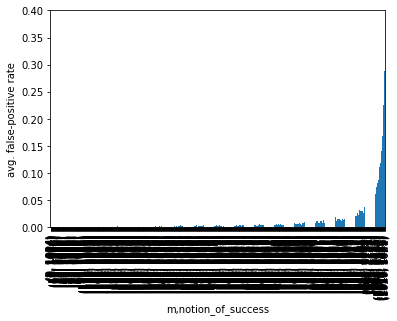

In [17]:
df_by_attack_good_sr_successful_mean['false_positive_rate'].plot(kind='bar', legend=False).set_ylabel("avg. false-positive rate")

Text(0, 0.5, 'avg. duration')

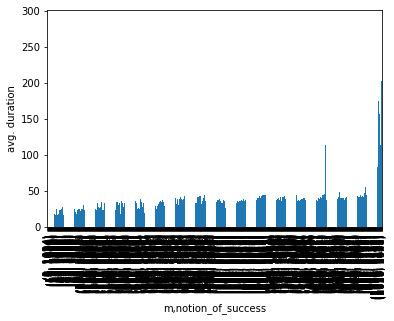

In [18]:
df_by_attack_good_sr_successful_mean['duration'].plot(kind='bar', legend=False).set_ylabel("avg. duration")